## Regresión lineal ##

Es un algoritmo de aprendizaje supervisado que se utiliza en machine learning y estadística.

Estima la relación entre una variable escalar "Y" que depende de otras variables explicativas "X".

Se representa como una recta que indica la tendencia del conjunto de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cd archivos/
#Vamos al directorio donde tenemos el archivo .csv

SyntaxError: invalid syntax (3914969627.py, line 1)

In [9]:
casas = pd.read_csv('USA_Housing.csv')
#cargamos el archivo .csv en un dataframe de pandas
casas.head()
#mostrar las primeras 5 filas del dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
casas.info()
#información del dataframe, tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
casas.describe()
#estadísticas descriptivas del dataframe, media, mediana, etc.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [12]:
casas.columns
#ver las columnas del dataframe

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

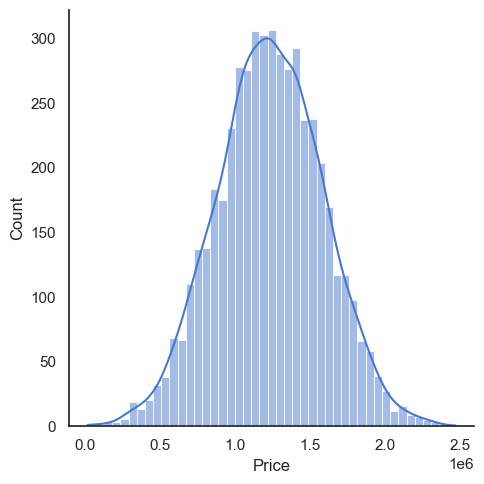

In [15]:
sns.displot(casas['Price'], kde=True)
#histograma de la columna Price

<Axes: >

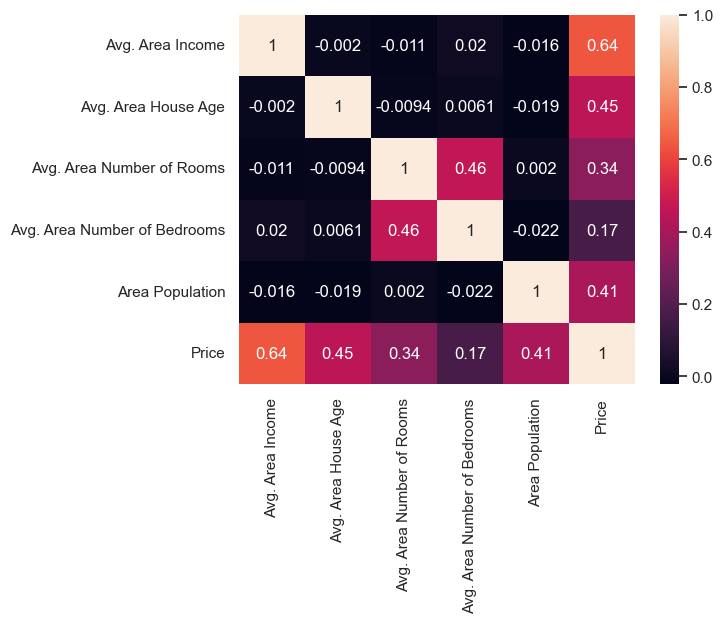

In [39]:

sns.heatmap(casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr(), annot=True)
#mapa de calor de las correlaciones entre las variables



##### Creando la variable dependiente y las variables independientes #####

In [40]:
from sklearn.model_selection import train_test_split
#importar la función para dividir el dataframe en train y test
from sklearn.linear_model import LinearRegression
#importar el modelo de regresión lineal

In [41]:
X = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
#definir las variables independientes

In [42]:
Y = casas['Price']
#dafinir la variable dependiente

##### Creando los sets de entrenamiento y de test #####

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#dividir el dataframe en train y test, 70% train y 30% test

In [46]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


##### Entrenando el modelo #####

In [47]:
lrm = LinearRegression()
#crear el modelo de regresión lineal
lrm.fit(X_train, Y_train)
#ajustar el modelo a los datos de entrenamiento

LinearRegression()

##### Evaluación del modelo de entrenamiento #####

In [48]:
from sklearn import metrics
#importar las métricas para evaluar el modelo

In [ ]:
predicciones = lrm.predict(X_test)
#predecir los valores de la variable dependiente con los datos de test


array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176],
      shape=(1500,))

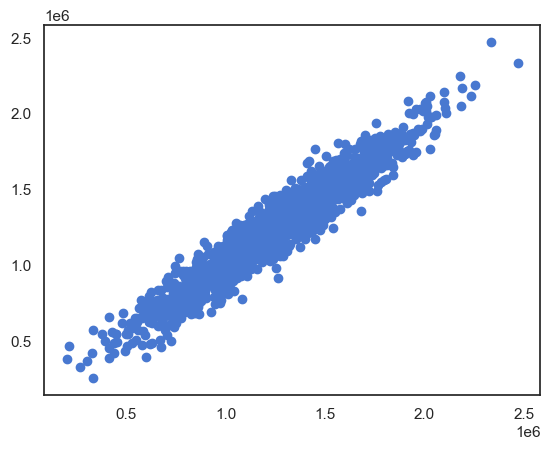

In [54]:
plt.scatter(Y_test, predicciones)
#gráfico de dispersión entre los valores reales y los valores predichos

<Axes: xlabel='Price', ylabel='Count'>

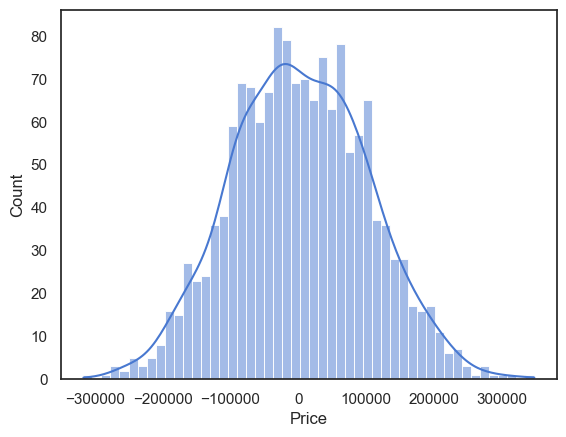

In [57]:
sns.histplot(Y_test - predicciones, bins=50, kde=True)
#histograma de los residuos márgenes de error

MAE (Mean Absolute Error)- Media del valor absoluto de los errores

In [59]:
metrics.mean_absolute_error(Y_test, predicciones)
#error absoluto medio

#debe ser lo menor posible, si es muy alto el modelo no es bueno

81135.56609336905

MSE (Mean Squared Error) - Media de los errores al cuadrado

In [60]:
metrics.mean_squared_error(Y_test, predicciones)
#error cuadrático medio

#debe ser lo menor posible, si es muy alto el modelo no es bueno

10068422551.401144

RMSE (Root Mean Squared Error) - Raíz cuadrada de la media de errores cuadráticos

In [61]:
np.sqrt(metrics.mean_squared_error(Y_test, predicciones))
#raíz del error cuadrático medio 

#debe ser lo menor posible, si es muy alto el modelo no es bueno   

np.float64(100341.52954485567)

# Ejercicios #

#### Regresión Lineal con Datos de Ventas ####

Supongamos que tienes un conjunto de datos que contiene información sobre las ventas de una tienda y la cantidad de dinero que se gastó en publicidad en diferentes medios (por ejemplo, televisión, radio y periódico).

Tu tarea es desarrollar una función llamada regresion_ventas que tome estos datos como entrada y ajuste un modelo de regresión lineal para predecir las futuras ventas en función de la inversión en publicidad.


```
def regresion_ventas(datos):

 

# Ejemplo de uso con datos reales
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'Periodico': [69.2, 45.1, 69.3, 58.5, 58.4],
    'Ventas': [22.1, 10.4, 9.3, 18.5, 12.9]
}
df = pd.DataFrame(data)
modelo_regresion = regresion_ventas(df)
 
# Estimaciones de ventas para nuevos datos de inversión en publicidad
nuevos_datos = pd.DataFrame({'TV': [200, 60, 30], 'Radio': [40, 20, 10], 'Periodico': [50, 10, 5]})
estimaciones_ventas = modelo_regresion.predict(nuevos_datos)
 
print("Estimaciones de Ventas:")
print(estimaciones_ventas)
```

Resultado:


```
Estimaciones de Ventas:
[21.54261464  8.48121675  4.16961329]
```

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#importar la función para dividir el dataframe en train y test
from sklearn.linear_model import LinearRegression
#importar el modelo de regresión lineal
from sklearn import metrics
#importar las métricas para evaluar el modelo


In [64]:
# Función de regresión lineal
def regresion_ventas(datos):
    df = pd.DataFrame(datos)
    X = df[['TV', 'Radio', 'Periodico']]
    Y = df['Ventas']
    lrm = LinearRegression()
    return lrm.fit(X, Y)